<a href="https://colab.research.google.com/github/MohammadHammoudeh14/Sonar-system-/blob/main/Mall_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mohammad** **Hammoudeh**

On this project i'm going to cluster mall customer based on Age, Income, and spending.

at the end of the project we are going to understand how many clusters is appropiate and description about every cluster.

Import the dependencies

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Data collection and preprocessing

In [45]:
path = '/content/drive/MyDrive/AXSOSACADEMY/Mall_Customers.csv'

In [46]:
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
# Dataset inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [48]:
# shape of the data
df.shape

(200, 5)

In [49]:
# check null values
df.isna().sum().sum()

np.int64(0)

In [50]:
# check duplicated rows
df.duplicated().sum()

np.int64(0)

In [51]:
df = df.set_index('CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [52]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [53]:
scaler = StandardScaler()

In [56]:
# scale num features
num_cols = df.select_dtypes('number').columns
print(num_cols)
num_cols = scaler.fit_transform(df[num_cols])

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [57]:
cat_cols = df.select_dtypes('object').columns
print(cat_cols)

Index(['Gender'], dtype='object')


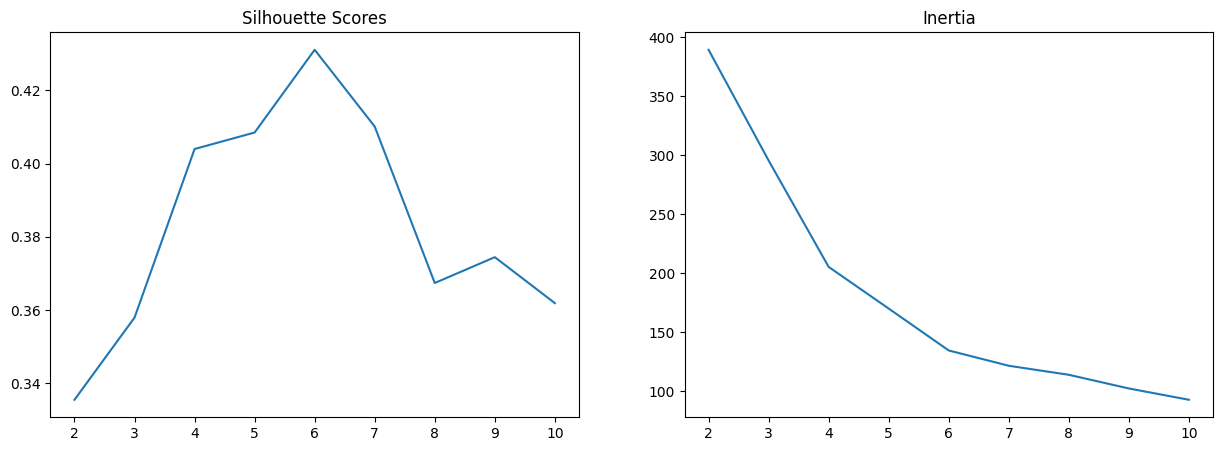

In [58]:
from sklearn.metrics import silhouette_score
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(num_cols)
  sils.append(silhouette_score(num_cols, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

Based on Silhouette Scores and Inertia, the number of cluster is 6

In [77]:
kmeans = KMeans(n_clusters=6, n_init= 'auto', random_state=42)
kmeans.fit(num_cols)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,5
4,Female,23,16,77,2
5,Female,31,17,40,5


In [78]:
# Group the dataframe by cluster and aggregate by mean values
cluster_groups = df.groupby('cluster', as_index=False)[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_groups

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,56.333333,54.266667,49.066667
1,1,32.692308,86.538462,82.128205
2,2,25.560000,26.480000,76.240000
3,3,26.125000,59.425000,44.450000
4,4,44.000000,90.133333,17.933333
5,5,45.523810,26.285714,19.380952


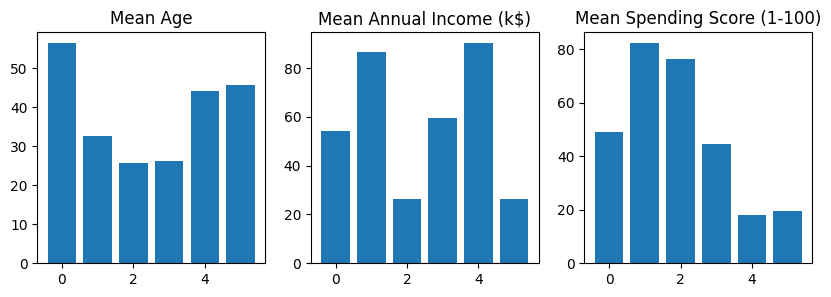

In [79]:
# Visualize means
fig, axes = plt.subplots(1,3, figsize = (10, 3))
# fig is an array of dimensions 1,3.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Clueter 0 :** Age (~ 50) High, annual income is (~ 55k) Moderate , spending (~ 50) Moderate.
Insight --> Older customers with average income and average spending. May prefer traditional products or loyalty programs.

**Cluster 1 :** Age (~ 33) Middle aged, Annual income (>80k) High and  spending score is (>80) High.

Insight -> Top-value customers — wealthy and willing to spend. Perfect for premium offers, luxury brands, and exclusive experiences.

**Cluster 2:** Age (~ 27) is the yougest group, and Annual income (~ 27k) is the lowest, and spending score is (~ 77) high.

Insight --> Young, low-income, but high-spending customers. They may be impulsive spenders or social lifestyle-driven buyers. Great target for trend-based marketing, but possibly not sustainable long-term customers.

**Cluster 3:** Age (~ 27), income is (~ 28) and spending score is (~ 42).

Insight --> These are young customers with limited income who still maintain a moderate spending pattern. They’re not high spenders, but they’re not inactive either — which makes them a potential growth segment if nurtured correctly.

**Cluster 4:** Age is (~ 46) Older adults,  income is (~ 90) very high, and Spending score is (~ 18) very low.

Insight --> Wealthy but cautious spenders. Possibly conservative or uninterested in mall shopping. May require personalized marketing or luxury experiences to engage.

**Cluster 5:** Age is (~ 45), income is (~ 25) Low , and spending is (~ 20) Low.

Insight -->  Balanced group. Average income and spending. Can be targeted with standard seasonal promotions and reliable product offerings